# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [50]:
import numpy
import matplotlib.pyplot as plt

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/lena.png` and show it:

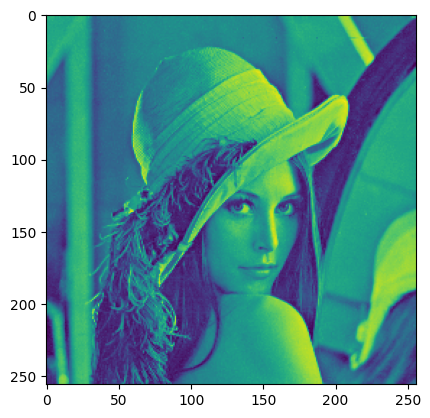

In [51]:
lena = plt.imread('data/lena.png')
plt.imshow(lena)

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical $3 \times 3$ Prewitt filters:

In [52]:
def prewitt_h_easy(img,size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
            if(p[1]>=n) and (p[1]<=(img.shape[1]-n-1)) and (p[0]>=n) and (p[0]<=(img.shape[0]-n-1)):
                y=p[0]-n+q[0]
                x=p[1]-n+q[1]
                if (q[0]==0):
                    f=-1
                elif (q[0]==2):
                    f=1
                else:
                    f=0
                neighborhood_sum+=img[y,x]*f
        neighborhood_sum=neighborhood_sum/(size**2)
        result[p] = neighborhood_sum
    return result
    
def prewitt_v_easy(img,size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
            if(p[1]>=n) and (p[1]<=(img.shape[1]-n-1)) and (p[0]>=n) and (p[0]<=(img.shape[0]-n-1)):
                y=p[0]-n+q[0]
                x=p[1]-n+q[1]
                if (q[1] == 0):
                    f=-1
                elif (q[1])==2:
                    f=1
                else:
                    f=0
                neighborhood_sum+=img[y,x]*f
        neighborhood_sum=neighborhood_sum/(size**2)
        result[p] = neighborhood_sum
    return result

In [60]:
def prewitt_v(img):
    result = numpy.zeros(img.shape)
    for p in numpy.ndindex(img.shape):
        if(p[1]>=1) and (p[1]<=(img.shape[1]-2)) and (p[0]>=1) and (p[0]<=(img.shape[0]-2)):
            neighborhood_sum = 0
            mask_1 = img[(p[0]-1),(p[1]-1):(p[1]+2)]
            mask_2 = img[(p[0]+1),(p[1]-1):(p[1]+2)]
            neighborhood_sum = sum(mask_1)*(-1) + (sum(mask_2))
            result[p] = neighborhood_sum / 6
    return result

def prewitt_h(img):
    result = numpy.zeros(img.shape)
    for p in numpy.ndindex(img.shape):
        if(p[1]>=1) and (p[1]<=(img.shape[1]-2)) and (p[0]>=1) and (p[0]<=(img.shape[0]-2)):
            neighborhood_sum = 0
            mask_1 = img[(p[0]-1):(p[0]+2), (p[1]-1)]
            mask_2 = img[(p[0]-1):(p[0]+2), (p[1]+1)]
            neighborhood_sum = sum(mask_1)*(-1) + (sum(mask_2))
            result[p] = neighborhood_sum / 6
    return result

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

(<matplotlib.image.AxesImage at 0x7f1a38dfa190>,
 <matplotlib.colorbar.Colorbar at 0x7f1a38dd1450>)

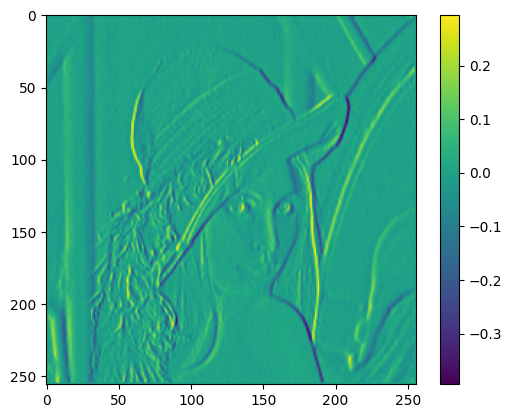

In [61]:
lena_h=prewitt_h(lena)
plt.imshow(lena_h), plt.colorbar()

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/lena_prewitt_h.tiff` and `data/lena_prewitt_v.tiff`:

(<matplotlib.image.AxesImage at 0x7f1a38f1db50>,
 <matplotlib.colorbar.Colorbar at 0x7f1a38d64a50>)

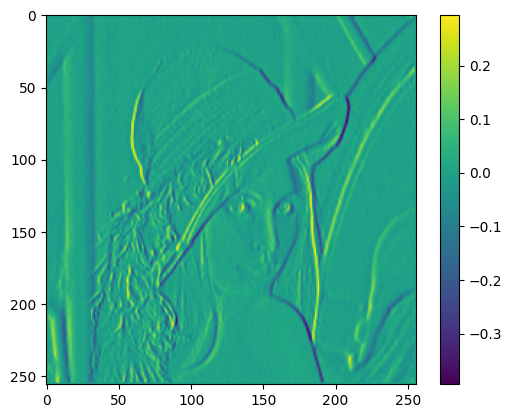

In [55]:
import skimage.io
lena_h_ideal=skimage.io.imread('data/lena_prewitt_h.tiff')
plt.imshow(lena_h_ideal), plt.colorbar()

In [62]:
assert numpy.allclose(lena_h,lena_h_ideal , atol=1/255)

In [63]:
lena_v = prewitt_v(lena)


---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

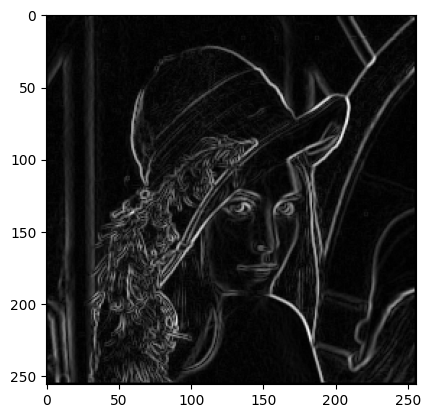

In [66]:
gradient = numpy.sqrt(lena_v**2+lena_h**2)
plt.imshow(gradient, 'grey')

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/lena_prewitt_gradmag.tiff`:

In [69]:
gradient_ideal=skimage.io.imread('data/lena_prewitt_gradmag.tiff')
assert numpy.allclose(gradient_ideal, gradient, atol=1/255)

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical $3 \times 3$ Sobel filtering, respectively:

In [80]:
def sobel_v(img):
    result = numpy.zeros(img.shape)
    for p in numpy.ndindex(img.shape):
        if(p[1]>=1) and (p[1]<=(img.shape[1]-2)) and (p[0]>=1) and (p[0]<=(img.shape[0]-2)):
            neighborhood_sum = 0
            mask_1 = img[(p[0]-1),(p[1]-1):(p[1]+2)]
            mask_2 = img[(p[0]+1),(p[1]-1):(p[1]+2)]
            neighborhood_sum = sum(mask_1)*(-1) - img[p[0]-1,p[1]] + (sum(mask_2) + img[p[0]+1,p[1]])
            result[p] = neighborhood_sum / 8
    return result

def sobel_h(img):
    result = numpy.zeros(img.shape)
    for p in numpy.ndindex(img.shape):
        if(p[1]>=1) and (p[1]<=(img.shape[1]-2)) and (p[0]>=1) and (p[0]<=(img.shape[0]-2)):
            neighborhood_sum = 0
            mask_1 = img[(p[0]-1):(p[0]+2), (p[1]-1)]
            mask_2 = img[(p[0]-1):(p[0]+2), (p[1]+1)]
            neighborhood_sum = sum(mask_1)*(-1) - img[p[0],p[1]-1] + (sum(mask_2) + img[p[0],p[1]+1])
            result[p] = neighborhood_sum / 8
    return result

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

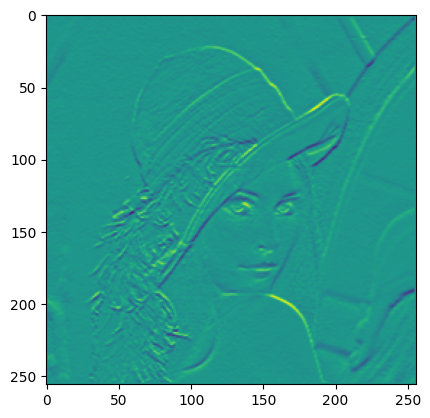

In [81]:
lena_vs=sobel_v(lena)
plt.imshow(lena_vs)
lena_hs=sobel_h(lena)

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/lena_sobel_h.tiff` and `data/lena_sobel_v.tiff`:

In [79]:
lena_hs_ideal=skimage.io.imread('data/lena_sobel_h.tiff')
assert numpy.allclose(lena_hs,lena_hs_ideal , atol=1/255)

lena_vs_ideal=skimage.io.imread('data/lena_sobel_v.tiff')
assert numpy.allclose(lena_vs,lena_vs_ideal , atol=1/255)